# Customer Churn Telecom Project


# Problem Definition & Tasks
The Data Science Team of a Telecom Company is given a task to address the churn of customers. The company provides a variety of services and the sales/customer service team are interested keeping existing customers and maxamizing profits by selling services. When customers churn, this can result in both a loss of short-term and long-term profits as well as additional costs to gain back customers.

The Company has tasked the team with the following:
*   Explore the given dataset to understand how churn is affecting company profits
*   Extract insights to determine what kinds of factors or characteristics lead to certain customer to churn
*   Determine what services the company can promote without causing customers to churn
*   Train and Implement predicitive models to determine if a given customer will churn so that customer service teams can intervene and keep customers

In [1]:
# Import
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

! pip install shap
import shap
shap.initjs()

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.3 MB/s eta 0:00:00


# Data Collection, Exploration, and Cleaning

In [2]:
# Data Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
data_path = 'https://raw.githubusercontent.com/stevensantos17/Customer_Churn_Project/main/Data/telecom_customer_churn.csv'
data_df = pd.read_csv(data_path, na_values=[""," ", "N/A", "n/a", "nan", "NaN"])
# Note: na_values are passed in to catch the missing values found through analysis in the column TotalCharges

In [3]:
data_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

### Analysis
Looking at the dataset, we can extract certain insights

*   Our Dataset contains 7043 customers with 19 different features and if they churned or not
*   Each of the customer IDs are unique so there are **no duplicates**
*   TotalCharges has **11 null values**, we will address these values later. The rest of the features have no null values
*   Features with 2 unique values are binary features
*   Features with 3+ unique values are categorical features (Ex. PaymentMethod) and will need to be processed
*   Interestingly, some similar features are recorded differently in the dataset. SeniorCitizen is recorded as "1/0" while Partner is recorded as "Yes/No" even though both can be treated as binary features. This must be the result of how the data was collected



## Handling Missing/Null Values

In [6]:
index_null = data_df["TotalCharges"].isnull()
missing_df = data_df.loc[index_null,:]
missing_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [7]:
nonmissing_df = data_df.loc[~index_null,:]
print("Min Tenure for non-missing rows (Months): {}".format(nonmissing_df["tenure"].min()))

Min Tenure for non-missing rows (Months): 1


### Missing Value Analysis
Looking at the dataset and the 11 customers with missing values for TotalCharges, it appears that these values are missing because they are new customers with a tenure of 0 months. All of the other 7032 rows have tensure values of at least one month. Therefore, this value was not availiable during the data collection.

With this knowledge, we can extrapolate that TotalCharges of 0 would be appropriate for these customers. None of these customers churned and it only represents less than 0.2% of our dataset so extrapolating their values is appropriate.

In [8]:
data_df["TotalCharges"] = data_df["TotalCharges"].fillna(0)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
data_df.loc[index_null,:]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


# Data Exploration & Insights

## Determine Impact of Churn on company profits

In [10]:
index_churn = data_df["Churn"] == "Yes"
churn_df = data_df.loc[index_churn]

# Customer Churn Analyis
percent_churn = sum(index_churn)/len(data_df)
print("Number of Customers who have churned: {:.2f}".format(sum(index_churn)))
print("Percent of Customers who have churned: {:.2f}%".format(percent_churn*100))

# Revenue Loss Analysis
monthly_churn_revenue_loss = sum(churn_df["MonthlyCharges"])
print("Monthly Revenue Loss due to Customer Churn: ${:,.2f}".format(monthly_churn_revenue_loss))
print("Percent of Monthly Revenue Loss due to Customer Churn: {:.2f}%".format(monthly_churn_revenue_loss*100/sum(data_df["MonthlyCharges"])))

# New Customer Revenue Analysis
nonmissing_df = data_df.loc[index_null,:]
est_new_customer_revenue = sum(nonmissing_df["MonthlyCharges"])
print("Estimated New Customer Monthly Revenue: ${:,.2f}".format(est_new_customer_revenue))

Number of Customers who have churned: 1869.00
Percent of Customers who have churned: 26.54%
Monthly Revenue Loss due to Customer Churn: $139,130.85
Percent of Monthly Revenue Loss due to Customer Churn: 30.50%
Estimated New Customer Monthly Revenue: $455.60


### Churn Impact Analysis
Around **26%** of customers have churned resulting in a loss of approximately **\$139K** or 30% of our potential monthly revenue. New Customers only resulted in monthly revenue of ~$450. This analysis shows that customer churn is having a large impact on the company's profits.

<Figure size 640x480 with 0 Axes>

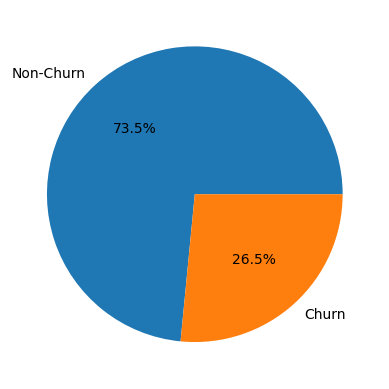

In [11]:
# Churn Impact Chart
plt.figure()
labels = 'Non-Churn', 'Churn'
sizes = [len(data_df)-sum(index_churn), sum(index_churn)]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%.1f%%')
plt.show()

## Extract Insights on Customer Churn

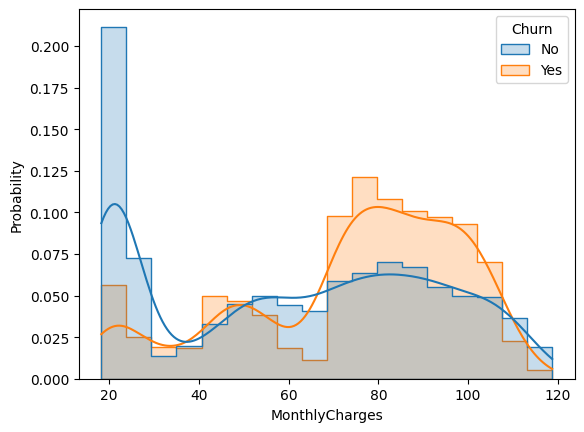

In [12]:
# MonthlyCharges
plt.figure()
sns.histplot(data_df,
             x="MonthlyCharges",
             hue="Churn",
             element="step",
             stat="probability",
             common_norm=False,
             kde=True)
plt.show()

Customers with higher Monthly Charges are more likely to churn than ones with lower charges. This also means that the customers responsible for the highest amount of monthly revenue are the customers the company is losing resulting in a large amout of revenue loss.

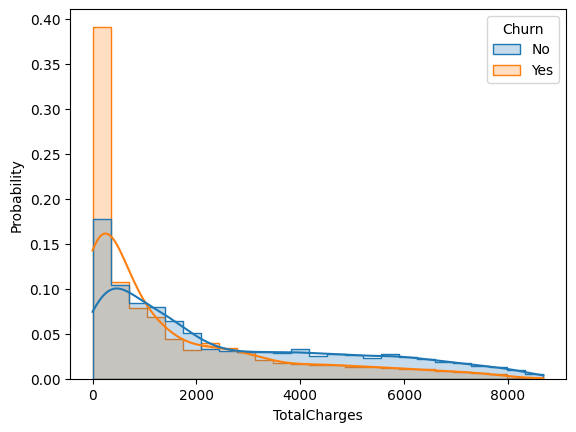

In [13]:
# TotalCharges
plt.figure()
sns.histplot(data_df,
             x="TotalCharges",
             hue="Churn",
             element="step",
             stat="probability",
             common_norm=False,
             kde=True)
plt.show()

According to the plot above, it seems like TotalCharges does not impact churn. However, we do see a large spike in Churn for TotalCharges in the first bin with the lowest amount of TotalCharges. This corresponds with the tenure analysis below. Tenure and TotalCharges are correlated features. The longer the customer has been signed up for services, the more total revenue has been collected.

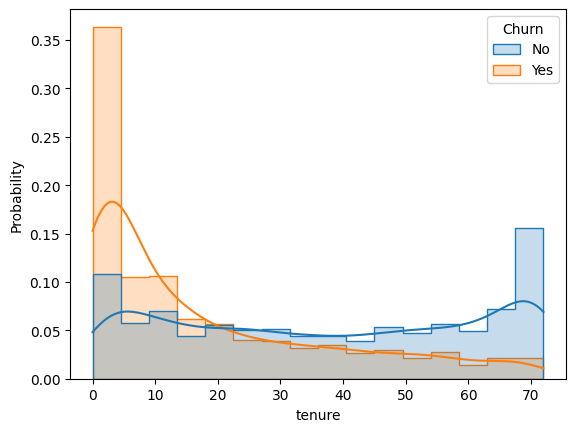

In [14]:
# Tenure
plt.figure()
sns.histplot(data_df,
             x="tenure",
             hue="Churn",
             element="step",
             stat="probability",
             common_norm=False,
             kde=True)
plt.show()

Customers with less tenure are more likely to churn than ones with higher tenure. To prevent churn, teams should target newly aquired customers

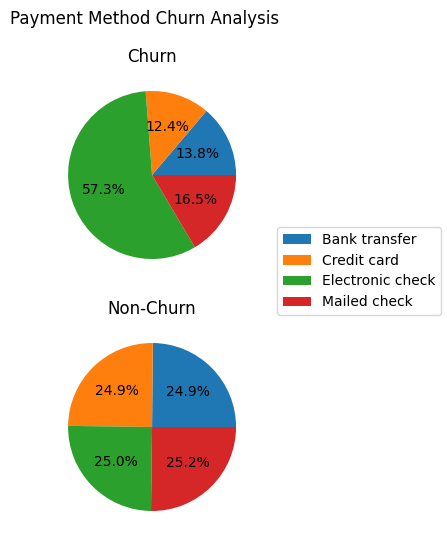

In [15]:
# Payment Method
churn_paymethod_counts = data_df.loc[data_df.Churn == "Yes",:].groupby(["PaymentMethod"])["PaymentMethod"].count()
nonchurn_paymethod_counts = data_df.loc[data_df.Churn == "No",:].groupby(["PaymentMethod"])["PaymentMethod"].count()

pie_labels_list = list(churn_paymethod_counts.index)
pie_labels_list = [x.replace('(automatic)','') for x in pie_labels_list]

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,6))
ax1.pie(churn_paymethod_counts, autopct='%.1f%%')
ax2.pie(nonchurn_paymethod_counts, autopct='%.1f%%')

ax1.set_title("Churn")
ax2.set_title("Non-Churn")
fig.legend(labels=pie_labels_list, loc="center right")
fig.suptitle("Payment Method Churn Analysis")
plt.show()

Customers who churned were more likely to use "Electronic Check" as a payment method. Customers who didnt churn were equally likely to use any of the 4 payment methods.

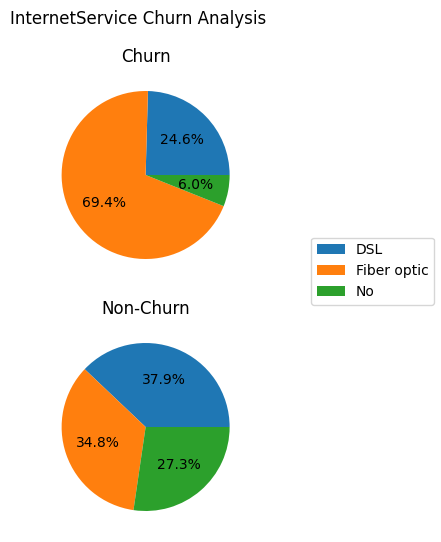

In [44]:
# InternetService
target_feature = "InternetService"
churn_counts = data_df.loc[data_df.Churn == "Yes",:].groupby([target_feature])[target_feature].count()
nonchurn_counts = data_df.loc[data_df.Churn == "No",:].groupby([target_feature])[target_feature].count()

pie_labels_list = list(churn_counts.index)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,6))
ax1.pie(churn_counts, autopct='%.1f%%')
ax2.pie(nonchurn_counts, autopct='%.1f%%')

ax1.set_title("Churn")
ax2.set_title("Non-Churn")
fig.legend(labels=pie_labels_list, loc="center right")
fig.suptitle("{} Churn Analysis".format(target_feature))
plt.show()

Customers who churned were more likely to have Fiber optic as their internet service and less likely to have no internet service.

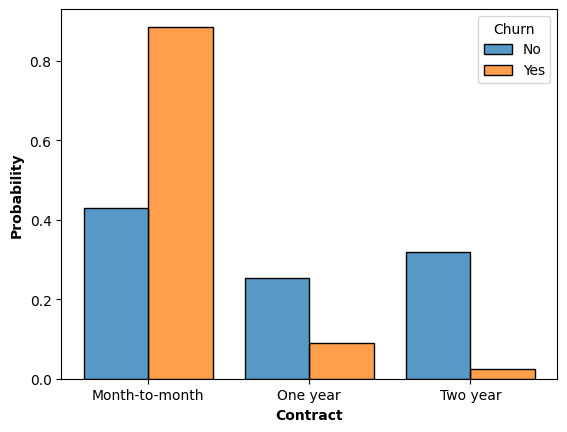

In [17]:
# Contract
plt.figure()
ax = sns.histplot(data_df,
                  x = "Contract",
                  hue="Churn",
                  element="bars",
                  stat="probability",
                  multiple="dodge",
                  shrink=.8,
                  common_norm=False)
ax.set_xlabel(ax.get_xlabel(), fontdict={"weight": "bold"})
ax.set_ylabel(ax.get_ylabel(), fontdict={"weight": "bold"})
plt.show()

Customer with shorter contracts (Ex. Month-to-Month) were more likely to churn than customers with longer contracts (Ex. Two Year)

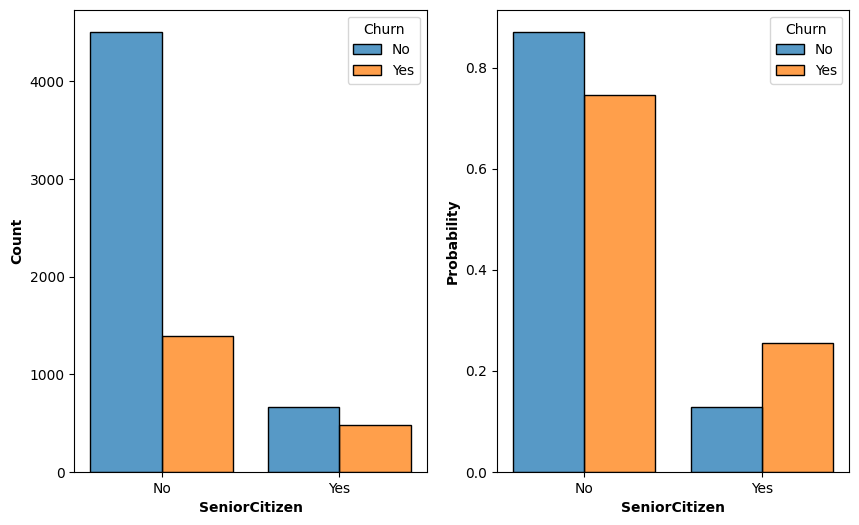

In [18]:
# SeniorCitizen
data_df.SeniorCitizen.replace((1, 0),('Yes', 'No'), inplace=True)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,6))
ax1 = sns.histplot(data_df,
                  x = "SeniorCitizen",
                  hue="Churn",
                  element="bars",
                  stat="count",
                  multiple="dodge",
                  shrink=.8,
                  common_norm=False,
                  ax = ax1)
ax1.set_xlabel(ax1.get_xlabel(), fontdict={"weight": "bold"})
ax1.set_ylabel(ax1.get_ylabel(), fontdict={"weight": "bold"})
ax2 = sns.histplot(data_df,
                  x = "SeniorCitizen",
                  hue="Churn",
                  element="bars",
                  stat="probability",
                  multiple="dodge",
                  shrink=.8,
                  common_norm=False,
                  ax = ax2)
ax2.set_xlabel(ax2.get_xlabel(), fontdict={"weight": "bold"})
ax2.set_ylabel(ax2.get_ylabel(), fontdict={"weight": "bold"})
plt.show()

Customers who are Senior Citizens have a tendency to Churn more often than non-Senior Citizens. However, an imbalance in the dataset exists where the number of non-Senior Citizens is much higher than the number of Senior Citizens.

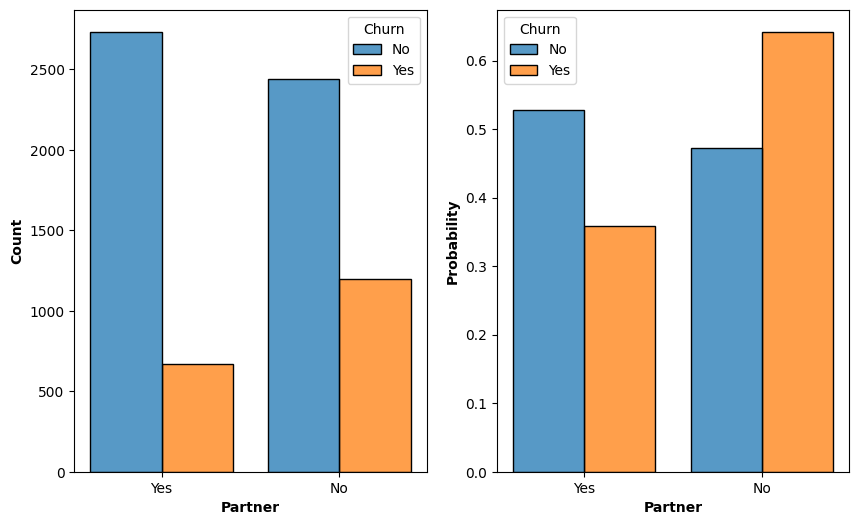

In [19]:
# Partner
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,6))
ax1 = sns.histplot(data_df,
                  x = "Partner",
                  hue="Churn",
                  element="bars",
                  stat="count",
                  multiple="dodge",
                  shrink=.8,
                  common_norm=False,
                  ax = ax1)
ax1.set_xlabel(ax1.get_xlabel(), fontdict={"weight": "bold"})
ax1.set_ylabel(ax1.get_ylabel(), fontdict={"weight": "bold"})
ax2 = sns.histplot(data_df,
                  x = "Partner",
                  hue="Churn",
                  element="bars",
                  stat="probability",
                  multiple="dodge",
                  shrink=.8,
                  common_norm=False,
                  ax = ax2)
ax2.set_xlabel(ax2.get_xlabel(), fontdict={"weight": "bold"})
ax2.set_ylabel(ax2.get_ylabel(), fontdict={"weight": "bold"})
plt.show()

Customers who have a partner less likely to churn than customers without a partner

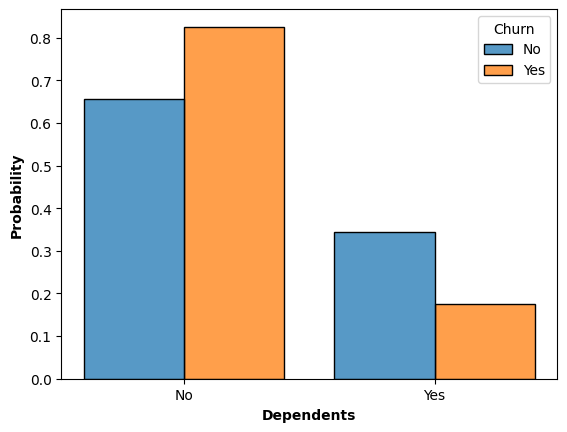

In [20]:
# Dependents
plt.figure()
ax = sns.histplot(data_df,
                  x = "Dependents",
                  hue="Churn",
                  element="bars",
                  stat="probability",
                  multiple="dodge",
                  shrink=.8,
                  common_norm=False)
ax.set_xlabel(ax.get_xlabel(), fontdict={"weight": "bold"})
ax.set_ylabel(ax.get_ylabel(), fontdict={"weight": "bold"})
plt.show()

Customers who have dependents are less likely to churn than those who dont have dependents

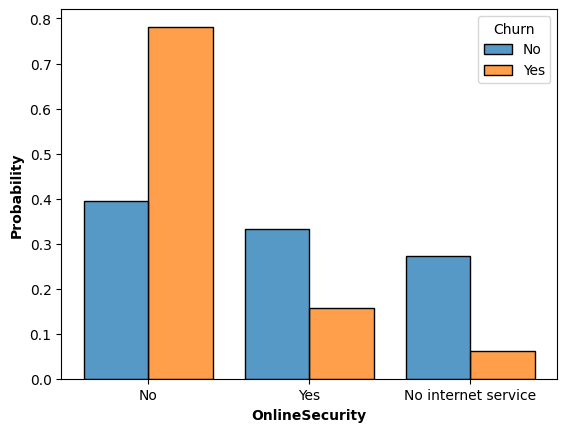

In [21]:
# OnlineSecurity
plt.figure()
ax = sns.histplot(data_df,
                  x = "OnlineSecurity",
                  hue="Churn",
                  element="bars",
                  stat="probability",
                  multiple="dodge",
                  shrink=.8,
                  common_norm=False)
ax.set_xlabel(ax.get_xlabel(), fontdict={"weight": "bold"})
ax.set_ylabel(ax.get_ylabel(), fontdict={"weight": "bold"})
plt.show()

Customers with No Online security were more likely to churn

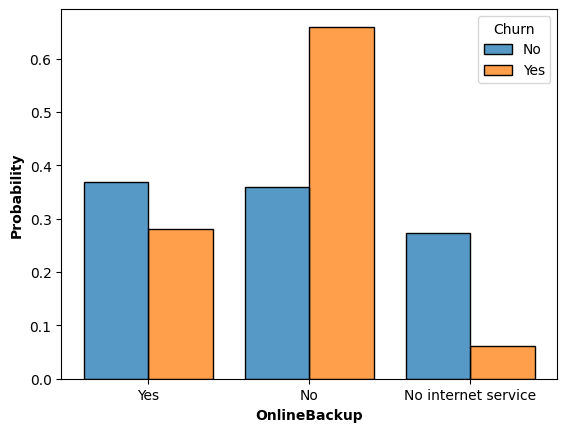

In [22]:
# OnlineBackup
plt.figure()
ax = sns.histplot(data_df,
                  x = "OnlineBackup",
                  hue="Churn",
                  element="bars",
                  stat="probability",
                  multiple="dodge",
                  shrink=.8,
                  common_norm=False)
ax.set_xlabel(ax.get_xlabel(), fontdict={"weight": "bold"})
ax.set_ylabel(ax.get_ylabel(), fontdict={"weight": "bold"})
plt.show()

Customers with No Online Backup were more likely to Churn.

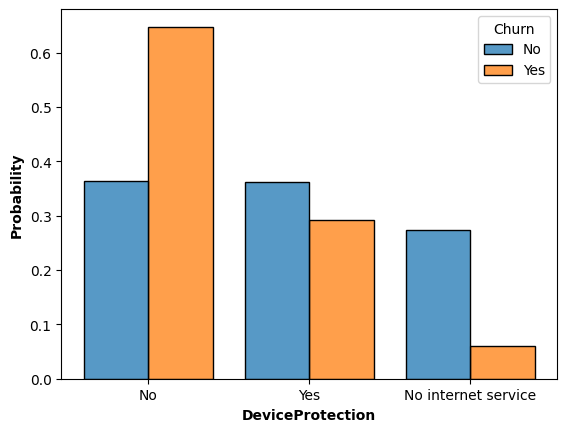

In [23]:
# DeviceProtection
plt.figure()
ax = sns.histplot(data_df,
                  x = "DeviceProtection",
                  hue="Churn",
                  element="bars",
                  stat="probability",
                  multiple="dodge",
                  shrink=.8,
                  common_norm=False)
ax.set_xlabel(ax.get_xlabel(), fontdict={"weight": "bold"})
ax.set_ylabel(ax.get_ylabel(), fontdict={"weight": "bold"})
plt.show()

Customers with no Device Protection were more likely to churn

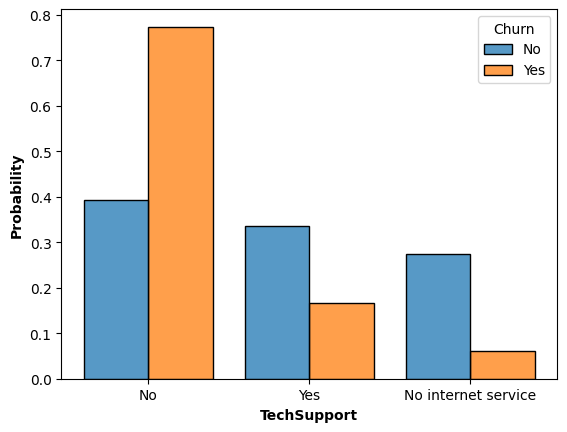

In [24]:
# TechSupport
plt.figure()
ax = sns.histplot(data_df,
                  x = "TechSupport",
                  hue="Churn", element="bars", stat="probability",
                  multiple="dodge", shrink=.8, common_norm=False)
ax.set_xlabel(ax.get_xlabel(), fontdict={"weight": "bold"})
ax.set_ylabel(ax.get_ylabel(), fontdict={"weight": "bold"})
plt.show()

Customers with no TechSupport were more likely to churn

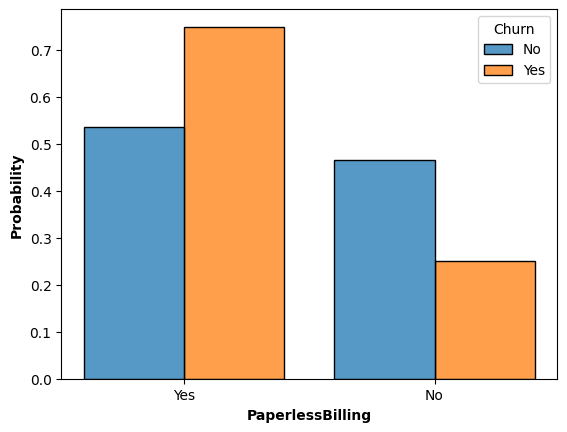

In [25]:
# PaperlessBilling
plt.figure()
ax = sns.histplot(data_df,
                  x = "PaperlessBilling",
                  hue="Churn", element="bars", stat="probability",
                  multiple="dodge", shrink=.8, common_norm=False)
ax.set_xlabel(ax.get_xlabel(), fontdict={"weight": "bold"})
ax.set_ylabel(ax.get_ylabel(), fontdict={"weight": "bold"})
plt.show()

Customers who have Paperless Billing had a tendency to churn more than customers without Paperless Billing

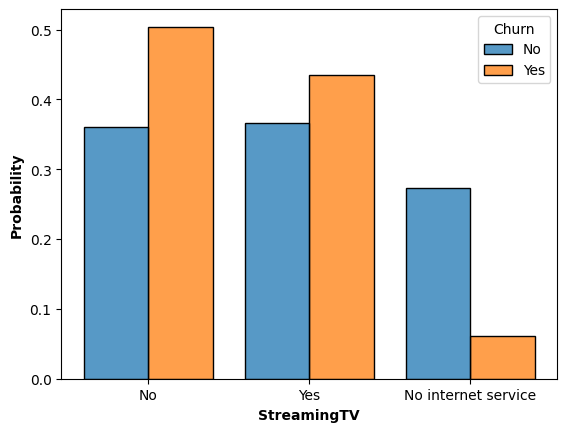

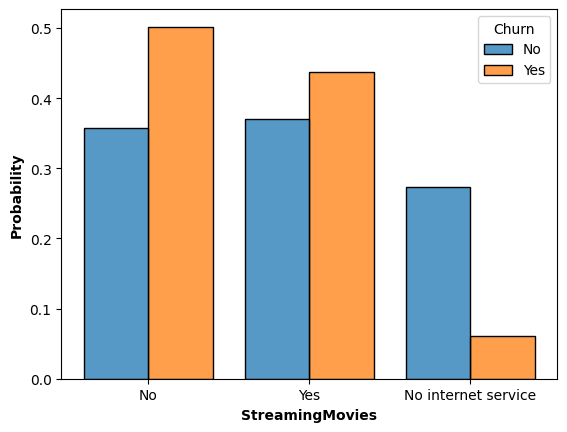

In [26]:
# StreamingTV
plt.figure()
ax = sns.histplot(data_df,
                  x = "StreamingTV",
                  hue="Churn", element="bars", stat="probability",
                  multiple="dodge", shrink=.8, common_norm=False)
ax.set_xlabel(ax.get_xlabel(), fontdict={"weight": "bold"})
ax.set_ylabel(ax.get_ylabel(), fontdict={"weight": "bold"})
plt.show()
# StreamingMovies
plt.figure()
ax = sns.histplot(data_df,
                  x = "StreamingMovies",
                  hue="Churn", element="bars", stat="probability",
                  multiple="dodge", shrink=.8, common_norm=False)
ax.set_xlabel(ax.get_xlabel(), fontdict={"weight": "bold"})
ax.set_ylabel(ax.get_ylabel(), fontdict={"weight": "bold"})
plt.show()

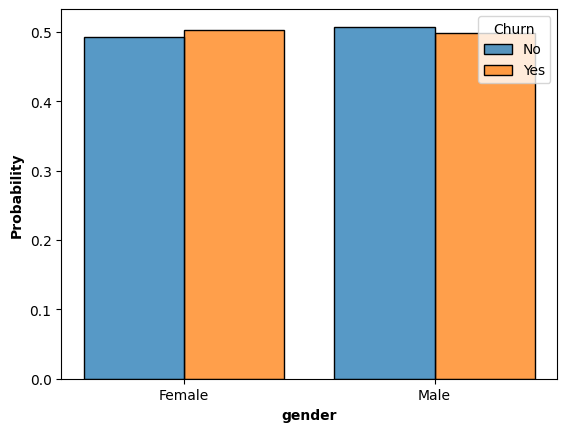

In [27]:
# Gender
plt.figure()
ax = sns.histplot(data_df,
                  x = "gender",
                  hue="Churn",
                  element="bars",
                  stat="probability",
                  multiple="dodge",
                  shrink=.8,
                  common_norm=False)
ax.set_xlabel(ax.get_xlabel(), fontdict={"weight": "bold"})
ax.set_ylabel(ax.get_ylabel(), fontdict={"weight": "bold"})
plt.show()

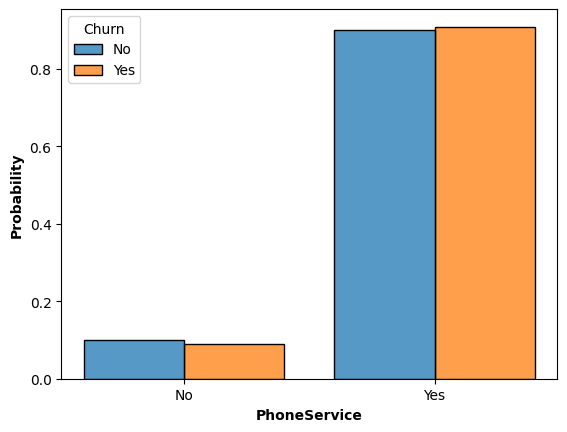

In [28]:
# PhoneService
plt.figure()
ax = sns.histplot(data_df,
                  x = "PhoneService",
                  hue="Churn",
                  element="bars",
                  stat="probability",
                  multiple="dodge",
                  shrink=.8,
                  common_norm=False)
ax.set_xlabel(ax.get_xlabel(), fontdict={"weight": "bold"})
ax.set_ylabel(ax.get_ylabel(), fontdict={"weight": "bold"})
plt.show()

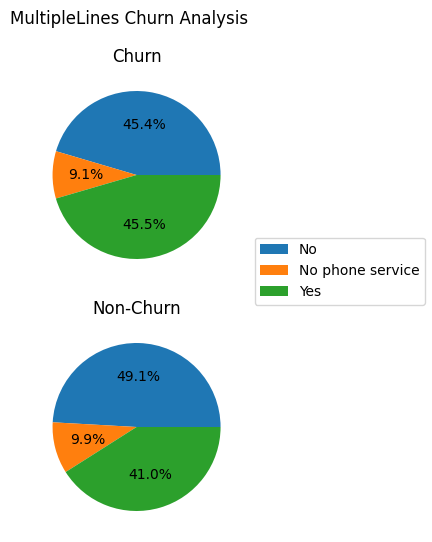

In [45]:
# MultipleLines
target_feature = "MultipleLines"
churn_counts = data_df.loc[data_df.Churn == "Yes",:].groupby([target_feature])[target_feature].count()
nonchurn_counts = data_df.loc[data_df.Churn == "No",:].groupby([target_feature])[target_feature].count()

pie_labels_list = list(churn_counts.index)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,6))
ax1.pie(churn_counts, autopct='%.1f%%')
ax2.pie(nonchurn_counts, autopct='%.1f%%')

ax1.set_title("Churn")
ax2.set_title("Non-Churn")
fig.legend(labels=pie_labels_list, loc="center right")
fig.suptitle("{} Churn Analysis".format(target_feature))
plt.show()

There seems to be no differences in churned vs non-churned customers based on if they have multiple lines, have phone service, their gender, or Stream TV/movies.

## Churn Data Insights Summary

The following customer attributes are associated with churn:
*   Higher Monthly Charges
*   Lower Tenure
*   Using Electronic Check as a Payment Method
*   Fiber optic for their Internet Service
*   Shorter Contracts like Month-to-Month
*   Having No Online Security
*   Having No Online Backup
*   Having No Device Protection
*   Having No Tech Support
*   Customers with a partner
*   Customers who are Senior Citizens
*   Customers who have no dependents

The following customer attributes have no impact on churn:
*   Gender
*   Multiple Lines
*   PhoneService
*   StreamingTV
*   StreamingMovies





## Churn Analysis Report

Based on the analysis by the Data Analytics Team, we would give the following recommendations:

**Customer Service Teams** should focus their retention efforts on customers who are newer to the company (Lower tenure) and have high monthly charges. These customers are at a high risk of churn. They should also focus on customers who have Month-to-Month contracts, pay using electronic check, and have Fiber Optic Internet. Teams should attempt to transition them to longer contracts contacts, different payment methods, and DSL Internet.

**Sales Teams** should focus on selling services like Online Security, Online Service, and Device Protection. These services will increase revenue and decrease churn. Services like Streaming, Phone Service, and Multiple Phone Lines may also increase revenue without affecting customer churn

**Advertising teams** should focus on customer with the following demographics: Customers with Partners, Dependents, or non-Senior Citizens. These customers tend to churn less which will generate more revenue





# Feature Engineering

In order to preprocess the datset for machine learning training, we will do the following
*   Remove Invalid Features
*   Format Binary Features
*   Encode Categorical Features



In [30]:
ml_df = data_df.copy(deep=True)
ml_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
# Drop Invalid Features
ml_df.drop(columns=['customerID'],inplace=True) # IDs are random and will not affect ML
ml_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
# Transform Binary Variables into 1/0
ml_df.SeniorCitizen.replace(('Yes', 'No'),(1,0), inplace=True)
ml_df.Partner.replace(('Yes', 'No'),(1,0), inplace=True)
ml_df.Dependents.replace(('Yes', 'No'),(1,0), inplace=True)
ml_df.PhoneService.replace(('Yes', 'No'),(1,0), inplace=True)
ml_df.PaperlessBilling.replace(('Yes', 'No'),(1,0), inplace=True)
ml_df.Churn.replace(('Yes', 'No'),(1,0), inplace=True)

ml_df['SeniorCitizen'] = ml_df['SeniorCitizen'].astype(str).astype(int)

ml_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [33]:
# Perform One-Hot Encoding on categorical features
ml_df = pd.get_dummies(ml_df,
                       columns=['MultipleLines',
                                'InternetService',
                                'OnlineSecurity',
                                'OnlineBackup',
                                'DeviceProtection',
                                'TechSupport',
                                'gender',
                                'StreamingTV',
                                'StreamingMovies',
                                'Contract',
                                'PaymentMethod'],
                       dtype=bool)

In [34]:
ml_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   PaperlessBilling                         7043 non-null   int64  
 6   MonthlyCharges                           7043 non-null   float64
 7   TotalCharges                             7043 non-null   float64
 8   Churn                                    7043 non-null   int64  
 9   MultipleLines_No                         7043 non-null   bool   
 10  MultipleLines_No phone service           7043 no

# Machine Learning Training and Evaluation

Our goal is to train a machine learning model to predict which customers will churn or not so that others teams within the company can implement retention efforts to keep those customers.

Therefore, the model should have a high recall of the Churn population to minimize the number of churn customers that the model predicts wont churn. The recall of the non-churn customers is still important to ensure resources are not used on customers who are unlikely to churn. Overall, we will focus on the ML model's Churn recall.

Based on some preliminary research, a **5% monthly churn rate** would be an ideal goal to hit. Therefore, given the current churn rate of 26%, the ML Churn Recall should be above 81.2%. The ML models should also perform well on new data to ensure that customer churn prevention is effective in the future.

## Train/Test Sets

We will first perform an 80/20 split of the data to both train and evaluate our machine learning models

In [35]:
target_variable = 'Churn' # Target Variable from dataset
X = ml_df.drop(columns=[target_variable])
y = ml_df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify = y)
print("Training Set: ", X_train.shape)
print("Test Set: ", X_test.shape)

Training Set:  (5634, 41)
Test Set:  (1409, 41)


## ML Model A/B Testing
We will compare different algorithms to investigate which method would best meet the objectives we set out to achieve

In [36]:
# Logistic Regression
lr_clf = LogisticRegression(random_state=1,
                            solver = 'liblinear',
                            class_weight = 'balanced')
lr_clf.fit(X_train, y_train)

print("Logistic Regression Training accuracy: ", lr_clf.score(X_train, y_train))
print("Logistic Regression Test accuracy: ", lr_clf.score(X_test, y_test))
print("Logistic Regression Training AUC: ", roc_auc_score(y_train, lr_clf.predict(X_train)))
print("Logistic Regression Test AUC: ", roc_auc_score(y_test, lr_clf.predict(X_test)))
print(classification_report(y_test, lr_clf.predict(X_test), target_names=["Not Churn","Churn"]))

Logistic Regression Training accuracy:  0.7520411785587504
Logistic Regression Test accuracy:  0.7352732434350603
Logistic Regression Training AUC:  0.7694957258672503
Logistic Regression Test AUC:  0.753209847839004
              precision    recall  f1-score   support

   Not Churn       0.90      0.71      0.80      1035
       Churn       0.50      0.79      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [37]:
# Random Forest
rfc_clf = RandomForestClassifier(random_state=1,
                                 max_depth = 6,
                                 class_weight = 'balanced')
rfc_clf.fit(X_train, y_train)

print("Random Forest Training accuracy: ", rfc_clf.score(X_train, y_train))
print("Random Forest Test accuracy: ", rfc_clf.score(X_test, y_test))
print("Random Forest Training AUC: ", roc_auc_score(y_train, rfc_clf.predict(X_train)))
print("Random Forest Test AUC: ", roc_auc_score(y_test, rfc_clf.predict(X_test)))
print(classification_report(y_test, rfc_clf.predict(X_test), target_names=["Not Churn","Churn"]))

Random Forest Training accuracy:  0.7657082002129926
Random Forest Test accuracy:  0.7374024130589071
Random Forest Training AUC:  0.7862751007829109
Random Forest Test AUC:  0.7563667364178872
              precision    recall  f1-score   support

   Not Churn       0.91      0.72      0.80      1035
       Churn       0.50      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [38]:
# Gradient Boost
gb_clf = GradientBoostingClassifier(random_state=1)
gb_clf.fit(X_train, y_train)

print("Gradiant Boost Training accuracy: ", gb_clf.score(X_train, y_train))
print("Gradiant Boost Test accuracy: ", gb_clf.score(X_test, y_test))
print("Gradiant Boost Training AUC: ", roc_auc_score(y_train, gb_clf.predict(X_train)))
print("Gradiant Boost Test AUC: ", roc_auc_score(y_test, gb_clf.predict(X_test)))
print(classification_report(y_test, gb_clf.predict(X_test), target_names=["Not Churn","Churn"]))

Gradiant Boost Training accuracy:  0.8251686190983316
Gradiant Boost Test accuracy:  0.8076650106458482
Gradiant Boost Training AUC:  0.7432082135749268
Gradiant Boost Test AUC:  0.7153969361130486
              precision    recall  f1-score   support

   Not Churn       0.84      0.91      0.87      1035
       Churn       0.68      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [39]:
# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

print("XGBoost Training accuracy: ", xgb_model.score(X_train, y_train))
print("XGBoost Test accuracy: ", xgb_model.score(X_test, y_test))
print("XGBoost Training AUC: ", roc_auc_score(y_train, xgb_model.predict(X_train)))
print("XGBoost Test AUC: ", roc_auc_score(y_test, xgb_model.predict(X_test)))
print(classification_report(y_test, xgb_model.predict(X_test), target_names=["Not Churn","Churn"]))

XGBoost Training accuracy:  0.9330848420305289
XGBoost Test accuracy:  0.7885024840312278
XGBoost Training AUC:  0.9029689041590677
XGBoost Test AUC:  0.7074762975018729
              precision    recall  f1-score   support

   Not Churn       0.84      0.88      0.86      1035
       Churn       0.62      0.53      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



The Random Forest Algorithm seems to perform well. The training and test accuracy are both high and don't differ much proving that these models should perform well on future data. The Churn Recall is high relative to the rest of the models, so we will tune the parameters of the Random Forest model for the final solution.

## Model Tuning & Training

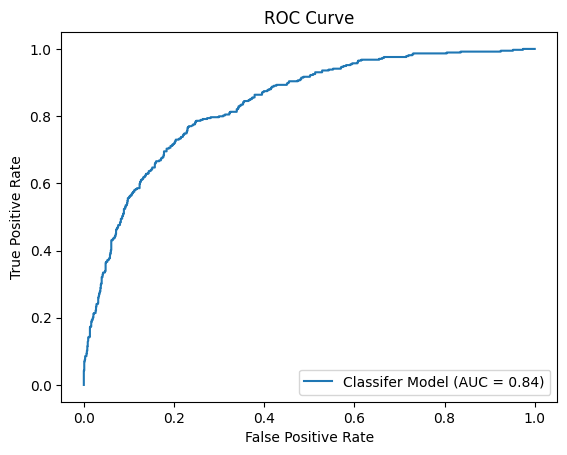

In [40]:
# ROC Curve
y_pred_prob = rfc_clf.predict_proba(X_test)
y_pred_prob = y_pred_prob[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = auc(fpr,tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Classifer Model')
display.plot()
plt.title("ROC Curve")
plt.show()

In [41]:
# Train Final Model
classifier_model = RandomForestClassifier(random_state=1,
                                 max_depth = 6,
                                 class_weight = {0: .25})
classifier_model.fit(X_train, y_train)

print("Random Forest Training accuracy: ", classifier_model.score(X_train, y_train))
print("Random Forest Test accuracy: ", classifier_model.score(X_test, y_test))
print("Random Forest Training AUC: ", roc_auc_score(y_train, classifier_model.predict(X_train)))
print("Random Forest Test AUC: ", roc_auc_score(y_test, classifier_model.predict(X_test)))
print(classification_report(y_test, classifier_model.predict(X_test), target_names=["Not Churn","Churn"]))

Random Forest Training accuracy:  0.7268370607028753
Random Forest Test accuracy:  0.6997870830376153
Random Forest Training AUC:  0.780329454467295
Random Forest Test AUC:  0.7452775840243872
              precision    recall  f1-score   support

   Not Churn       0.92      0.65      0.76      1035
       Churn       0.46      0.84      0.60       374

    accuracy                           0.70      1409
   macro avg       0.69      0.75      0.68      1409
weighted avg       0.80      0.70      0.72      1409



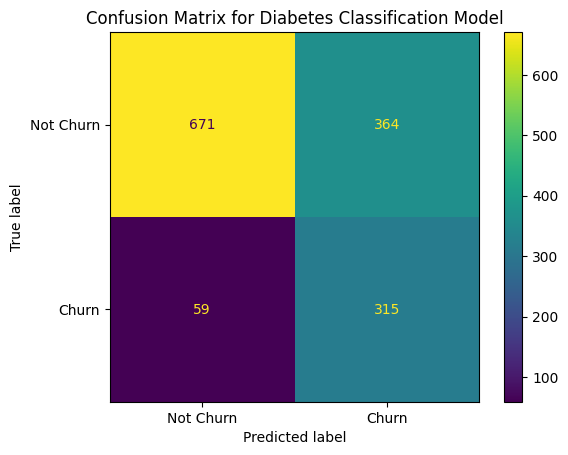

In [42]:
# Display Results of ML Model on Training Set
ConfusionMatrixDisplay.from_estimator(classifier_model, X_test, y_test,
                                      display_labels=["Not Churn","Churn"])
plt.title("Confusion Matrix for Diabetes Classification Model")
plt.show()

The Churn Prediction Model was trained using a Random Forest Algorithm. The Churn Recall was ~84%. If retention efforts are effective, the company can reduce their churn rate down to ~4%. The downside is that this ML model incorrectly predicts a customer will churn ~36% of the time. Further efforts are needed to reduce this to reduce retention effort expenses.

## ML SHAP Analysis

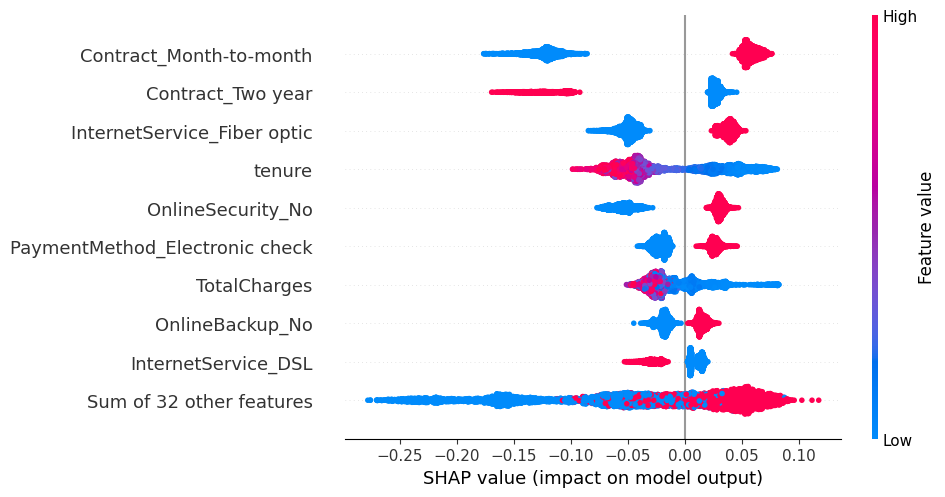

In [43]:
explainer = shap.Explainer(classifier_model)
shap_values = explainer.shap_values(X_train)
explanation = explainer(X_train)
shap.plots.beeswarm(explanation[:,:,1])

The SHAP Beeswarm plot shows the top contributing features and how their values impact the model prediction. We can see that this plot aligns well with our previous insights on the dataset where shorter contracts, fiber-optic internet, and low tenure were important for causing churn.

# Summary

We have create a data analytics report to the other teams within the company on which customers are at a high risk for churning, what services can be promoted to decrease or not change the risk of churning, and what demographics to focus on to retain customers.

Based on the analysis by the Data Analytics Team, we would give the following recommendations:
* **Customer Service Teams** should focus their retention efforts on customers who are newer to the company (Lower tenure) and have high monthly charges. These customers are at a high risk of churn. They should also focus on customers who have Month-to-Month contracts, pay using electronic check, and have Fiber Optic Internet. Teams should attempt to transition them to longer contracts contacts, different payment methods, and DSL Internet.
* **Sales Teams** should focus on selling services like Online Security, Online Service, and Device Protection. These services will increase revenue and decrease churn. Services like Streaming, Phone Service, and Multiple Phone Lines may also increase revenue without affecting customer churn
* **Advertising teams** should focus on customer with the following demographics: Customers with Partners, Dependents, or non-Senior Citizens. These customers tend to churn less which will generate more revenue

We have also trained and evaluated a machine learning random forest model to predict which customers will churn or not. If utilized, this model has the potential to reduce overall customer churn to ~4% as opposed to the current ~26%.